# Victoria, Australia Housing Data Wrangling
#### Developer: Anh Van
#### Email: ngockhueanhvan@gmail.com

Date: 01/06/2019

Version: 1.0

Environment: Python 3.7.0 and Jupyter notebook

#### Libraries used:
* pandas: work with dataframe
* numpy: work with calculation
* shapefile: read shapefiles
* shapely: get the suburbs' boundary
* string: work with string's format
* re: extract information from files using patterns
* ast: convert a list-look-alike string into list 
* datetime: convert string to datetime values & operands

#### Introduction: Data integration & Data reshaping
Multiple datasets in various formats are given and the task is about creating housing information in Victoria, Australia. The assessment includes the following tasks.
##### 1. Data integration
In this task, we are going to integrate several datasets into one uniformed schema. By doing so, we need to add some new columns and find/fix possible problems in the data
* Suburb: The property suburb. The suburb must only be calculated using Vic_suburb_boundary.zip. Default value: “not available”
* train_station_id: The closest train station to the property that has a direct trip to the Southern Cross Railway Station. A direct trip is a trip that there are no connections (transfers) in the trip from the origin to the destination. Default value: 0
* distance_to_train_station: The direct distance from the closest train station to the property that has a direct trip to the Southern Cross Railway Station. Default value: 0
* travel_min_to_CBD: The average travel time (minutes) from the closest train station (regional/metropolitan) that has a direct trip to the “Southern Cross Railway Station” on weekdays (i.e. Monday-Friday) departing between 7 to 9:30 am.
* over_priced?: A boolean feature indicating whether or not the price of the property is higher than the median price of the similar properties(with respect to bedrooms, bathrooms, parking_space, and property_type attributes) in the same suburb on the year of selling. Default value: -1
* crime_A_average: The average of type A crime for three years prior to selling in the local government area of the property as the property.
* crime_B_average: The average of type B crime for three years prior to selling in the local government area of the property as the property.
* crime_C_average: The average of type C crime for three years prior to selling in the local government area of the property as the property.

##### 2. Data reshaping
In this task, we are going to study the effect of different normalization/transformation methods (i.e. standardization, min-max normalization, log, power, and root transformation) on Rooms , crime_C_average, travel_min_to_CBD , and property_age attributes, then observe and explain their effect assuming that we want to build a linear model on price using these attributes as the predictors of the linear model and recommend which one(s) do you think would work better on this data. When building the linear model, the same normalization/transformation method can be applied to each of these attributes.

## I. Import libraries

In [1]:
import pandas as pd
import shapefile # read shapefiles
from shapely.geometry import Point # 
from shapely.geometry import shape #
import string # format string objects
import numpy as np
import re
import ast
pd.set_option('mode.chained_assignment', None)

## II. Task 1: Data Integration
In this task, we are going to integrate several datasets into one uniformed schema. By doing so, we need to add some new columns and find/fix possible problems in the data
* Suburb: The property suburb. The suburb must only be calculated using Vic_suburb_boundary.zip. Default value: “not available”
* train_station_id: The closest train station to the property that has a direct trip to the Southern Cross Railway Station. A direct trip is a trip that there are no connections (transfers) in the trip from the origin to the destination. Default value: 0
* distance_to_train_station: The direct distance from the closest train station to the property that has a direct trip to the Southern Cross Railway Station. Default value: 0
* travel_min_to_CBD: The average travel time (minutes) from the closest train station (regional/metropolitan) that has a direct trip to the “Southern Cross Railway Station” on weekdays (i.e. Monday-Friday) departing between 7 to 9:30 am.
* over_priced?: A boolean feature indicating whether or not the price of the property is higher than the median price of the similar properties(with respect to bedrooms, bathrooms, parking_space, and property_type attributes) in the same suburb on the year of selling. Default value: -1
* crime_A_average: The average of type A crime for three years prior to selling in the local government area of the property as the property.
* crime_B_average: The average of type B crime for three years prior to selling in the local government area of the property as the property.
* crime_C_average: The average of type C crime for three years prior to selling in the local government area of the property as the property.

#### Load dataset
In this step, we are going to
* Load the dataset
* Insert new columns such as suburb, train_station_id, distance_to_train_station
* Reshuffle the columns to satisfy the defined schema

In [2]:
# load the dataset
main = pd.read_csv("29915910.csv")
main.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
0,ID818110813,1/29 Logan St,3,h,1800000.0,27/11/2016,2.0,2.0,316.0,33.0,-37.8273,145.0786
1,ID422132083,13/37 Greville St,1,u,342000.0,3/09/2016,1.0,1.0,0.0,59.0,-37.8486,144.9872
2,ID211592138,16/11 Berry St,3,t,800000.0,28/05/2016,2.0,1.0,169.0,12.0,-37.8122,144.8965
3,ID691895484,35 Henry St,3,h,1037000.0,3/09/2016,1.0,1.0,188.0,109.0,-37.7953,144.9275
4,ID316179565,3/34 Bute St,1,u,290000.0,15/10/2016,1.0,1.0,0.0,99.0,-37.8956,145.0705


In [3]:
# insert new columns to the dataframe and default values
main.insert(loc=2, column='Suburb', value='not available') # suburb
main.insert(loc=3, column='train_station_id',value=0) # closet train station
main.insert(loc=4, column='distance_to_train_station', value=0) # distance to the closet train station
main.insert(loc=5, column='travel_min_to_CBD', value=0)# travel time to CBD
main.insert(loc=6, column='over_priced?', value=-1) # over-priced or not 
main.insert(loc=7, column='crime_A_average', value=-1) # type-A crime rate
main.insert(loc=8, column='crime_B_average', value=-1) # type-B crime rate
main.insert(loc=9, column='crime_C_average', value=-1) # type-C crime rate

In [4]:
# reshuffle the columns location to match with the defined schema
main = main[['ID','Address','Suburb','Price','Type','Date','Rooms','Bathroom','Car','Landsize','Age','Lattitude','Longtitude','train_station_id','distance_to_train_station','travel_min_to_CBD','over_priced?','crime_A_average','crime_B_average','crime_C_average']]

In [5]:
main.head()

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,train_station_id,distance_to_train_station,travel_min_to_CBD,over_priced?,crime_A_average,crime_B_average,crime_C_average
0,ID818110813,1/29 Logan St,not available,1800000.0,h,27/11/2016,3,2.0,2.0,316.0,33.0,-37.8273,145.0786,0,0,0,-1,-1,-1,-1
1,ID422132083,13/37 Greville St,not available,342000.0,u,3/09/2016,1,1.0,1.0,0.0,59.0,-37.8486,144.9872,0,0,0,-1,-1,-1,-1
2,ID211592138,16/11 Berry St,not available,800000.0,t,28/05/2016,3,2.0,1.0,169.0,12.0,-37.8122,144.8965,0,0,0,-1,-1,-1,-1
3,ID691895484,35 Henry St,not available,1037000.0,h,3/09/2016,3,1.0,1.0,188.0,109.0,-37.7953,144.9275,0,0,0,-1,-1,-1,-1
4,ID316179565,3/34 Bute St,not available,290000.0,u,15/10/2016,1,1.0,1.0,0.0,99.0,-37.8956,145.0705,0,0,0,-1,-1,-1,-1


In [6]:
# some of the columns' names are incorrect, thus need to be renamed
main.rename(columns={'Landsize':'LandSize','Lattitude':'Latitude','Longtitude':'Longitude'},inplace=True)

In [7]:
main.head()

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,LandSize,Age,Latitude,Longitude,train_station_id,distance_to_train_station,travel_min_to_CBD,over_priced?,crime_A_average,crime_B_average,crime_C_average
0,ID818110813,1/29 Logan St,not available,1800000.0,h,27/11/2016,3,2.0,2.0,316.0,33.0,-37.8273,145.0786,0,0,0,-1,-1,-1,-1
1,ID422132083,13/37 Greville St,not available,342000.0,u,3/09/2016,1,1.0,1.0,0.0,59.0,-37.8486,144.9872,0,0,0,-1,-1,-1,-1
2,ID211592138,16/11 Berry St,not available,800000.0,t,28/05/2016,3,2.0,1.0,169.0,12.0,-37.8122,144.8965,0,0,0,-1,-1,-1,-1
3,ID691895484,35 Henry St,not available,1037000.0,h,3/09/2016,3,1.0,1.0,188.0,109.0,-37.7953,144.9275,0,0,0,-1,-1,-1,-1
4,ID316179565,3/34 Bute St,not available,290000.0,u,15/10/2016,1,1.0,1.0,0.0,99.0,-37.8956,145.0705,0,0,0,-1,-1,-1,-1


In [8]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 20 columns):
ID                           720 non-null object
Address                      720 non-null object
Suburb                       720 non-null object
Price                        720 non-null float64
Type                         720 non-null object
Date                         720 non-null object
Rooms                        720 non-null int64
Bathroom                     720 non-null float64
Car                          720 non-null float64
LandSize                     720 non-null float64
Age                          720 non-null float64
Latitude                     720 non-null float64
Longitude                    720 non-null float64
train_station_id             720 non-null int64
distance_to_train_station    720 non-null int64
travel_min_to_CBD            720 non-null int64
over_priced?                 720 non-null int64
crime_A_average              720 non-null int64
crime_B_aver

### 1. Duplications
* Duplicated tuples need to be removed. It helps to prevent inconsistencies in the future. For example, when we need to update information of a particular property and we fail to update all the duplicated tuples, we will have data inconsistencies in the dataset (update anomoly). Furthermore, duplicates will make the distribution biased. For example, many dupicates in lower-priced properties will make the distribution median lower than the actual value.

In [9]:
# detect the duplicated tuples and print out
dup = main[main.duplicated(keep=False)]
dup = dup.sort_values(by='ID', ascending=True)
dup

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,LandSize,Age,Latitude,Longitude,train_station_id,distance_to_train_station,travel_min_to_CBD,over_priced?,crime_A_average,crime_B_average,crime_C_average
695,ID121025589,7 Whitmuir Rd,not available,1230000.0,h,25/02/2017,3,1.0,2.0,676.0,93.0,-37.91610,145.02840,0,0,0,-1,-1,-1,-1
269,ID121025589,7 Whitmuir Rd,not available,1230000.0,h,25/02/2017,3,1.0,2.0,676.0,93.0,-37.91610,145.02840,0,0,0,-1,-1,-1,-1
709,ID165781082,117 Pearson St,not available,901000.0,h,23/04/2016,3,1.0,4.0,357.0,89.0,-37.76200,144.94970,0,0,0,-1,-1,-1,-1
624,ID165781082,117 Pearson St,not available,901000.0,h,23/04/2016,3,1.0,4.0,357.0,89.0,-37.76200,144.94970,0,0,0,-1,-1,-1,-1
701,ID217086323,59 Summit Rd,not available,740000.0,h,27/05/2017,3,1.0,1.0,650.0,18.0,-38.15882,145.12914,0,0,0,-1,-1,-1,-1
384,ID217086323,59 Summit Rd,not available,740000.0,h,27/05/2017,3,1.0,1.0,650.0,18.0,-38.15882,145.12914,0,0,0,-1,-1,-1,-1
537,ID218725146,2/1073 Centre Rd,not available,651000.0,h,7/05/2016,4,2.0,2.0,214.0,9.0,-37.92440,145.08830,0,0,0,-1,-1,-1,-1
719,ID218725146,2/1073 Centre Rd,not available,651000.0,h,7/05/2016,4,2.0,2.0,214.0,9.0,-37.92440,145.08830,0,0,0,-1,-1,-1,-1
11,ID229908118,673 Canning St,not available,1628000.0,h,27/05/2017,3,1.0,0.0,216.0,11.0,-37.78026,144.97554,0,0,0,-1,-1,-1,-1
712,ID229908118,673 Canning St,not available,1628000.0,h,27/05/2017,3,1.0,0.0,216.0,11.0,-37.78026,144.97554,0,0,0,-1,-1,-1,-1


In [10]:
# remove the duplicated values but keep the first occurence
main = main.drop_duplicates(keep='first').reset_index()
main.drop(columns='index', axis=0, inplace=True)
main.head()

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,LandSize,Age,Latitude,Longitude,train_station_id,distance_to_train_station,travel_min_to_CBD,over_priced?,crime_A_average,crime_B_average,crime_C_average
0,ID818110813,1/29 Logan St,not available,1800000.0,h,27/11/2016,3,2.0,2.0,316.0,33.0,-37.8273,145.0786,0,0,0,-1,-1,-1,-1
1,ID422132083,13/37 Greville St,not available,342000.0,u,3/09/2016,1,1.0,1.0,0.0,59.0,-37.8486,144.9872,0,0,0,-1,-1,-1,-1
2,ID211592138,16/11 Berry St,not available,800000.0,t,28/05/2016,3,2.0,1.0,169.0,12.0,-37.8122,144.8965,0,0,0,-1,-1,-1,-1
3,ID691895484,35 Henry St,not available,1037000.0,h,3/09/2016,3,1.0,1.0,188.0,109.0,-37.7953,144.9275,0,0,0,-1,-1,-1,-1
4,ID316179565,3/34 Bute St,not available,290000.0,u,15/10/2016,1,1.0,1.0,0.0,99.0,-37.8956,145.0705,0,0,0,-1,-1,-1,-1


### 2. Suburb
* Now, we are going to find the suburb of the properties with the use of Shapefiles

In [11]:
sf = shapefile.Reader("./vic_suburb_boundary/VIC_LOCALITY_POLYGON_shp")
recs = sf.records()
shapes = sf.shapes()

def Suburb(lon, lat):
    point = lon, lat
    for i in range(len(shapes)):
        boundary = shapes[i]
        if Point(point).within(shape(boundary)):
            suburb = recs[i][6]
            return string.capwords(suburb)

In [12]:
for index in range(len(main)):
    lon = main.Longitude[index]
    lat = main.Latitude[index]
    main.Suburb[index] = Suburb(lon, lat) 

In [13]:
main.head()

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,LandSize,Age,Latitude,Longitude,train_station_id,distance_to_train_station,travel_min_to_CBD,over_priced?,crime_A_average,crime_B_average,crime_C_average
0,ID818110813,1/29 Logan St,Canterbury,1800000.0,h,27/11/2016,3,2.0,2.0,316.0,33.0,-37.8273,145.0786,0,0,0,-1,-1,-1,-1
1,ID422132083,13/37 Greville St,Prahran,342000.0,u,3/09/2016,1,1.0,1.0,0.0,59.0,-37.8486,144.9872,0,0,0,-1,-1,-1,-1
2,ID211592138,16/11 Berry St,Yarraville,800000.0,t,28/05/2016,3,2.0,1.0,169.0,12.0,-37.8122,144.8965,0,0,0,-1,-1,-1,-1
3,ID691895484,35 Henry St,Kensington,1037000.0,h,3/09/2016,3,1.0,1.0,188.0,109.0,-37.7953,144.9275,0,0,0,-1,-1,-1,-1
4,ID316179565,3/34 Bute St,Murrumbeena,290000.0,u,15/10/2016,1,1.0,1.0,0.0,99.0,-37.8956,145.0705,0,0,0,-1,-1,-1,-1


### 3. Train-related attributes

We need to integrate some train-related attributes, including
* (1) The closest station
* (2) Distance to train station
* (3) Time travel to CBD


#### Railway dataset
According to [GTFS release notes](https://discover.data.vic.gov.au/dataset/ptv-timetable-and-geographic-information-2015-gtfs?fbclid=IwAR0XB-kJAdphBZSaWg-BdVYVH3WUlM_EgWz1Av4zqZpK-CbT6WcRn4GxOCk), each file in GTFS folder is correspond to one transportation type. In particular:
- 1 - Regional Train
- 2 - Metropolitan Train
- 3 - Metropolitan Tram
- 4 - Metropolitan Bus
- 5 - Regional Coach
- 6 - Regional Bus
- 7 - TeleBus
- 8 – Night Bus
- 10 - Interstate
- 11 - SkyBus

Furthermore, as specified in the [Reference](https://developers.google.com/transit/gtfs/reference/#term-definitions), route_type == 2 indicates rail way transportation

Since we only consider Railway transportation for this assignment, we only need to load the datasets from (1) Regional Train, (2) Metropolitan Train and (10) Interstate to Jupiter Notebook. Next, in each dataset, we only need to look at the route_type ==2

#### Closest station & distance to train station
The closest train station to the property that has a direct trip to the Southern Cross Railway Station on weekdays (i.e. Monday-Friday) departing between 7 to 9:30 am. A direct trip is a trip that there are no connections (transfers) in the trip from the origin to the destination. Default value: 0
To find the closest train station, we are going to:

Here we need to load datasets to Jupiter Notebook
* calendar: select service_id that is available for all weekdays ==> service_id
* stop_times: extract all the trips that have all-weekdays service_id ==> trip_id
* trips: from the selected trip_id, find the stations that have direct routes to SCRS departing between 7-9:30 am ==> stop_id
    * Find all the trips that have Southern Cross Railway Station (SCRS) as a stop
    * For each detected trip, find all the stations that are stopped before the train reaching to SCRS. Those stops should have the stop_sequence less than or equal to the stop sequence of SCRS
* stops: from the stop_id, retrieve the stop information such as longitude and latitude for the calculation of distance to the property
    * For each property, calculate the distance to all the detected stations. The station with the minimum distance is the closest station to that property

##### Load datasets

In [14]:
# load stop_times datasets from the three folder (1), (2) and (10)

# (1) regional train
stop_times1 = pd.read_csv("./gtfs/1/stop_times.txt", sep=',') 
stop_times1['Source'] = 1 # add the source

# (2) metropolitan train
stop_times2 = pd.read_csv("./gtfs/2/stop_times.txt", sep=',')
stop_times2['Source'] = 2 # add the source

# (10) interstate train
stop_times10 = pd.read_csv("./gtfs/10/stop_times.txt", sep=',')
stop_times10['Source'] = 10 # add the source

# concatinate these three datasets
stop_times = pd.concat([stop_times1, stop_times2, stop_times10], ignore_index = True, sort=False).reset_index()
stop_times = stop_times.drop(['index'], axis=1) # drop index column
stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,Source
0,7548.UR.1-V08-A-mjp-1.1.H,06:08:00,06:08:00,20291,1,NaN,0,0,0.000000,1
1,7548.UR.1-V08-A-mjp-1.1.H,06:42:00,06:42:00,20346,2,NaN,0,0,52720.840026,1
2,7548.UR.1-V08-A-mjp-1.1.H,06:55:00,06:57:00,20341,3,NaN,0,0,68786.649688,1
3,7548.UR.1-V08-A-mjp-1.1.H,07:16:00,07:16:00,20339,4,NaN,0,0,94514.728171,1
4,7548.UR.1-V08-A-mjp-1.1.H,07:32:00,07:34:00,20351,5,NaN,0,0,116895.210301,1


In [15]:
# load calender datasets from the three folder (1), (2) and (10)

# (1) regional train
calendar1 = pd.read_csv("./gtfs/1/calendar.txt", sep=',')
calendar1['Source'] = 1 # add the source

# (2) metropolitan train
calendar2 = pd.read_csv("./gtfs/2/calendar.txt", sep=',')
calendar2['Source'] = 2 # add the source

# (10) interstate train
calendar10 = pd.read_csv("./gtfs/10/calendar.txt", sep=',')
calendar10['Source'] = 10 # add the source

# concatinate these three datasets
calendar = pd.concat([calendar1, calendar2, calendar10], ignore_index = True, sort=False).reset_index()
calendar = calendar.drop(['index'], axis=1)
calendar.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date,Source
0,UR,0,0,0,1,0,0,0,20190509,20190509,1
1,T6,0,0,0,0,1,0,0,20190510,20190510,1
2,T2,0,0,0,0,0,1,0,20190511,20190511,1
3,UJ,0,0,0,0,0,0,1,20190512,20190512,1
4,UO,1,0,0,0,0,0,0,20190513,20190513,1


In [16]:
# load trips datasets from the three folder (1), (2) and (10)

# (1) regional train
trips1 = pd.read_csv("./gtfs/1/trips.txt", sep=',')
trips1['Source'] = 1 # add the source

# (2) metropolitan train
trips2 = pd.read_csv("./gtfs/2/trips.txt", sep=',')
trips2['Source'] = 2 # add the source

# (10) interstate train
trips10 = pd.read_csv("./gtfs/10/trips.txt", sep=',')
trips10['Source'] = 10 # add the source

# concatinate these three datasets
trips = pd.concat([trips1, trips2, trips10], ignore_index = True, sort=False).reset_index()
trips = trips.drop(['index'], axis=1)
trips.head()

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id,Source
0,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0,1
1,1-V08-G-mjp-1,T0,1052.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0,1
2,1-V08-G-mjp-1,T0,1053.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0,1
3,1-V08-G-mjp-1,T0,1522.T0.1-V08-G-mjp-1.4.R,1-V08-G-mjp-1.4.R,Bairnsdale,1,1
4,1-V08-G-mjp-1,T0,1523.T0.1-V08-G-mjp-1.5.R,1-V08-G-mjp-1.5.R,Bairnsdale,1,1


In [17]:
# load stops datasets from the three folder (1), (2) and (10)

# (1) regional train
stops1 = pd.read_csv("./gtfs/1/stops.txt", sep=',') 

# (2) metropolitan train
stops2 = pd.read_csv("./gtfs/2/stops.txt", sep=',')

# (10) interstate train
stops10 = pd.read_csv("./gtfs/10/stops.txt", sep=',')

# concatinate these three datasets
stops = pd.concat([stops1, stops2, stops10], ignore_index = True, sort=False).reset_index()
stops = stops.drop(['index'], axis=1) # drop index column
stops.head()

,stop_id,stop_name,stop_lat,stop_lon
0,17204,Wallan Railway Station (Wallan),-37.416861,145.005372
1,19980,Melton Railway Station (Melton South),-37.703293,144.572524
2,19981,Rockbank Railway Station (Rockbank),-37.729261,144.650631
3,19982,Deer Park Railway Station (Deer Park),-37.777764,144.772304
4,19998,Sunbury Railway Station (Sunbury),-37.579206,144.728165


In [18]:
# detect the duplicated stops and print out
dupl = stops[stops.duplicated(keep=False)]
dupl = dupl.sort_values(by='stop_id', ascending=True)
dupl

,stop_id,stop_name,stop_lat,stop_lon
7,20043,Southern Cross Railway Station (Melbourne City),-37.818334,144.952525
331,20043,Southern Cross Railway Station (Melbourne City),-37.818334,144.952525
9,20288,Ararat Railway Station (Ararat),-37.282205,142.936914
332,20288,Ararat Railway Station (Ararat),-37.282205,142.936914
55,20335,North Shore Railway Station (North Shore),-38.098377,144.365321
333,20335,North Shore Railway Station (North Shore),-38.098377,144.365321
81,20616,Nhill Railway Station (Nhill),-36.332222,141.653890
337,20616,Nhill Railway Station (Nhill),-36.332222,141.653890
82,20617,Dimboola Railway Station (Dimboola),-36.454180,142.032464
338,20617,Dimboola Railway Station (Dimboola),-36.454180,142.032464


In [19]:
# remove the duplicated values but keep the first occurence
stops = stops.drop_duplicates(keep='first').reset_index()
stops.drop(columns='index', axis=0, inplace=True)
stops.head()

,stop_id,stop_name,stop_lat,stop_lon
0,17204,Wallan Railway Station (Wallan),-37.416861,145.005372
1,19980,Melton Railway Station (Melton South),-37.703293,144.572524
2,19981,Rockbank Railway Station (Rockbank),-37.729261,144.650631
3,19982,Deer Park Railway Station (Deer Park),-37.777764,144.772304
4,19998,Sunbury Railway Station (Sunbury),-37.579206,144.728165


##### From calendar, select service_id that is available for all weekdays

In [20]:
selected_calendar = calendar[(calendar.monday==1) & (calendar.tuesday==1) & (calendar.wednesday==1) & (calendar.thursday==1) & (calendar.friday==1)]
weekdays_service_id = list(set(selected_calendar.service_id.tolist()))
weekdays_service_id

['T0_2', 'T0_1', 'T0_3', 'T0']

##### From trips, extract all the trips that have all-weekdays service_id

In [21]:
weekdays_trips = trips[(trips['service_id'].isin(weekdays_service_id))].reset_index()
weekdays_trips.drop('index',inplace=True, axis=1)
weekdays_trip_id = list(set(weekdays_trips.trip_id.tolist()))
len(weekdays_trip_id)

3764

##### From stops, find the stop ID of Southern Cross Raiway Station (SCRS) 
We can find two values of SCRS as the below tables
* 20043
* 22180

In [22]:
sc_id = stops[stops['stop_name'].str.contains('Southern Cross Railway')]
sc_id

,stop_id,stop_name,stop_lat,stop_lon
7,20043,Southern Cross Railway Station (Melbourne City),-37.818334,144.952525
319,22180,Southern Cross Railway Station (Melbourne City),-37.817936,144.951411


##### From stop_times, find all the trips that have SCRS as a stop
Those are the trips that have '20043' and '22148' as a stops and store the trip_id in a list

In [23]:
# keep only the trips that have SCRS as a stop 
direct_trips = stop_times[(stop_times.stop_id == 20043)|(stop_times.stop_id == 22180)]

# store the trip_id in this list
direct_trip_id = list(set(direct_trips.trip_id.tolist()))

##### For each trip, identify the stop_sequence and arrival time of SCRS

In the stop_times dataset, stop_sequence identifies the order of the stops for a particular trip. The values for stop_sequence must increase throughout the trip but do not need to be consecutive. For example, the first stop on the trip could have a stop_sequence of 1, the second stop on the trip could have a stop_sequence of 23, the third stop could have a stop_sequence of 40, and so on.

We want to find all the stations that have direct trips to SCRS. If we have the stop_sequence of SCRS for each trip, we will retrieve all the stop_id of stations that have stop_sequence less than or equal to stop_sequence of SCRS.

In [24]:
direct = stop_times[(stop_times.stop_id == 20043)|(stop_times.stop_id == 22180)]

direct['sc_trip_seq'] = list(zip(direct.trip_id, direct.stop_sequence))

# create a dictionary having keys as trip_id and values as SCRS's stop_sequence
sc_sequence_dict = dict(direct.sc_trip_seq.tolist())
sc_sequence_dict

{'7548.UR.1-V08-A-mjp-1.1.H': 23,
 '7549.UR.1-V08-A-mjp-1.2.H': 23,
 '7550.UR.1-V08-A-mjp-1.2.H': 23,
 '7779.UR.1-V08-A-mjp-1.3.R': 1,
 '7780.UR.1-V08-A-mjp-1.4.R': 1,
 '7781.UR.1-V08-A-mjp-1.5.R': 1,
 '8199.T6.1-V08-B-mjp-1.1.H': 23,
 '8200.T6.1-V08-B-mjp-1.2.H': 23,
 '8201.T6.1-V08-B-mjp-1.2.H': 23,
 '8443.T6.1-V08-B-mjp-1.3.R': 1,
 '8444.T6.1-V08-B-mjp-1.4.R': 1,
 '8445.T6.1-V08-B-mjp-1.5.R': 1,
 '8903.T2.1-V08-C-mjp-1.1.H': 23,
 '8904.T2.1-V08-C-mjp-1.1.H': 23,
 '8905.T2.1-V08-C-mjp-1.1.H': 23,
 '9028.T2.1-V08-C-mjp-1.2.R': 1,
 '9029.T2.1-V08-C-mjp-1.2.R': 1,
 '9030.T2.1-V08-C-mjp-1.2.R': 1,
 '9261.UJ.1-V08-D-mjp-1.1.H': 23,
 '9262.UJ.1-V08-D-mjp-1.1.H': 23,
 '9412.UJ.1-V08-D-mjp-1.2.H': 21,
 '9365.UJ.1-V08-D-mjp-1.3.R': 1,
 '9366.UJ.1-V08-D-mjp-1.3.R': 1,
 '9390.UJ.1-V08-D-mjp-1.4.R': 1,
 '9636.UO.1-V08-E-mjp-1.1.H': 23,
 '9637.UO.1-V08-E-mjp-1.2.H': 23,
 '9638.UO.1-V08-E-mjp-1.2.H': 23,
 '9826.UO.1-V08-E-mjp-1.3.R': 1,
 '9827.UO.1-V08-E-mjp-1.4.R': 1,
 '9828.UO.1-V08-E-mjp-1.5.R'

In [25]:
direct = stop_times[(stop_times.stop_id == 20043)|(stop_times.stop_id == 22180)]

direct['sc_arrival_time'] = list(zip(direct.trip_id, direct.arrival_time))

# create a dictionary having keys as trip_id and values as SCRS's arrival_time
sc_arrival_dict = dict(direct.sc_arrival_time.tolist())
sc_arrival_dict

{'7548.UR.1-V08-A-mjp-1.1.H': '09:57:00',
 '7549.UR.1-V08-A-mjp-1.2.H': '16:35:00',
 '7550.UR.1-V08-A-mjp-1.2.H': '22:08:00',
 '7779.UR.1-V08-A-mjp-1.3.R': '07:20:00',
 '7780.UR.1-V08-A-mjp-1.4.R': '13:20:00',
 '7781.UR.1-V08-A-mjp-1.5.R': '18:34:00',
 '8199.T6.1-V08-B-mjp-1.1.H': '09:57:00',
 '8200.T6.1-V08-B-mjp-1.2.H': '16:35:00',
 '8201.T6.1-V08-B-mjp-1.2.H': '22:08:00',
 '8443.T6.1-V08-B-mjp-1.3.R': '07:20:00',
 '8444.T6.1-V08-B-mjp-1.4.R': '13:20:00',
 '8445.T6.1-V08-B-mjp-1.5.R': '18:34:00',
 '8903.T2.1-V08-C-mjp-1.1.H': '10:06:00',
 '8904.T2.1-V08-C-mjp-1.1.H': '16:10:00',
 '8905.T2.1-V08-C-mjp-1.1.H': '20:19:00',
 '9028.T2.1-V08-C-mjp-1.2.R': '07:25:00',
 '9029.T2.1-V08-C-mjp-1.2.R': '11:56:00',
 '9030.T2.1-V08-C-mjp-1.2.R': '18:16:00',
 '9261.UJ.1-V08-D-mjp-1.1.H': '11:30:00',
 '9262.UJ.1-V08-D-mjp-1.1.H': '20:19:00',
 '9412.UJ.1-V08-D-mjp-1.2.H': '17:10:00',
 '9365.UJ.1-V08-D-mjp-1.3.R': '08:04:00',
 '9366.UJ.1-V08-D-mjp-1.3.R': '18:16:00',
 '9390.UJ.1-V08-D-mjp-1.4.R': '10:

In [26]:
# retrieve all the trips having direct routes to SCRS and available all weekdays
direct_trips = stop_times[(stop_times['trip_id'].isin(direct_trip_id)) & (stop_times['trip_id'].isin(weekdays_trip_id))]
len(direct_trips)

45546

In [27]:
# add a column to the dataframe which gives info on the SCRS's stop_sequence
direct_trips['SC_stop_sequence'] = np.nan
direct_trips['SC_stop_sequence'] = direct_trips['trip_id'].map(sc_sequence_dict) # using the dictionary
direct_trips['SC_arrival_time'] = direct_trips['trip_id'].map(sc_arrival_dict)

In [28]:
direct_trips

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,Source,SC_stop_sequence,SC_arrival_time
578,1051.T0.1-V08-G-mjp-1.1.H,06:08:00,06:08:00,20291,1,NaN,0,0,0.000000,1,23,09:57:00
579,1051.T0.1-V08-G-mjp-1.1.H,06:42:00,06:42:00,20346,2,NaN,0,0,52720.840026,1,23,09:57:00
580,1051.T0.1-V08-G-mjp-1.1.H,06:55:00,06:57:00,20341,3,NaN,0,0,68786.649688,1,23,09:57:00
581,1051.T0.1-V08-G-mjp-1.1.H,07:16:00,07:16:00,20339,4,NaN,0,0,94514.728171,1,23,09:57:00
582,1051.T0.1-V08-G-mjp-1.1.H,07:32:00,07:34:00,20351,5,NaN,0,0,116895.210301,1,23,09:57:00
583,1051.T0.1-V08-G-mjp-1.1.H,07:45:00,07:45:00,20330,6,NaN,0,0,130530.089787,1,23,09:57:00
584,1051.T0.1-V08-G-mjp-1.1.H,07:57:00,07:57:00,20328,7,NaN,0,0,145000.117101,1,23,09:57:00
585,1051.T0.1-V08-G-mjp-1.1.H,08:16:00,08:16:00,20357,10,NaN,0,0,175519.536474,1,23,09:57:00
586,1051.T0.1-V08-G-mjp-1.1.H,08:23:00,08:23:00,20308,11,NaN,0,0,183185.641193,1,23,09:57:00
587,1051.T0.1-V08-G-mjp-1.1.H,08:36:00,08:36:00,20313,14,NaN,0,0,200482.793316,1,23,09:57:00


##### From trips:  find trips departing between 7-9:30 am
* Select the direct trips that depart between 7-9:30 am

In [29]:
# function to convert string to time format
from datetime import datetime
import datetime
def convert_str_time(time_string):
    try:
        time_date = pd.to_datetime(time_string, format='%H:%M:%S')
        return time_date
    except ValueError:
        return time_string

In [30]:
# define boolean value function to check whether the time is between 7-9:30 am
from datetime import datetime
def check_departure(time):
    start = datetime.strptime('7:00:00','%H:%M:%S')
    end = datetime.strptime('09:30:00','%H:%M:%S')
    try:
        if time > start and time < end or time == start or time == end:
            return 1
        else:
            return 0
    except TypeError:
        return 0

In [31]:
# convert datetime data type in the sliced dataset
direct_trips['departure_time'] = direct_trips['departure_time'].apply(convert_str_time)

In [32]:
# create the boolean column to check departure time
direct_trips['departure_boolean'] = np.nan

from datetime import datetime
direct_trips['departure_boolean'] = direct_trips['departure_time'].apply(check_departure)

In [33]:
# retrieve the direct trips that available all weekdays and have departure times from 7-9:30 am
direct_trips = direct_trips[direct_trips.departure_boolean == 1]

In [34]:
# keep only  the recordes having stop_sequence less than or equal to the SCRS's stop_sequence
direct_trips = direct_trips[(direct_trips['stop_sequence']<direct_trips['SC_stop_sequence'])|(direct_trips['stop_sequence']==direct_trips['SC_stop_sequence'])]

Below is the list of all stations that have direct trips to SCRS all weekdays departing from 7-9:30 am 

In [35]:
final_stop_id = list(set(direct_trips.stop_id.tolist()))
len(final_stop_id)

287

##### Find distance to the closest stations
* Next, we write a function to calculate the distance between two points on Earth, given each point's latitude and longitude.
* The program is referred from the [link](https://www.geeksforgeeks.org/program-distance-two-points-earth/).

In [36]:
# retrieve all the information of the detected train stations
final_stops = stops[stops['stop_id'].isin(final_stop_id)].reset_index()
final_stops.drop('index', inplace=True, axis=1)
final_stops.head()

,stop_id,stop_name,stop_lat,stop_lon
0,17204,Wallan Railway Station (Wallan),-37.416861,145.005372
1,19980,Melton Railway Station (Melton South),-37.703293,144.572524
2,19981,Rockbank Railway Station (Rockbank),-37.729261,144.650631
3,19982,Deer Park Railway Station (Deer Park),-37.777764,144.772304
4,19998,Sunbury Railway Station (Sunbury),-37.579206,144.728165


In [37]:
# Python 3 program to calculate Distance Between Two Points on Earth 
from math import radians, cos, sin, asin, sqrt 
def finddistance(lat1, lat2, lon1, lon2): 
      
    # The math module contains a function named 
    # radians which converts from degrees to radians. 
    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))  
     
    # Radius of earth in kilometers
    r = 6378
       
    # calculate the result 
    return(round(c * r * 1000,2)) # round up to 2 decimal numbers

In [38]:
# convert the column from int to float so that it will have 2 decimal numbers
main['distance_to_train_station'] = main['distance_to_train_station'].astype(float)

Next, we write a for loop through the records in the main dataset to fill in the train_station_id and distance_to_train_station

In [39]:
# loop through the records in the main dataset to fill in the train_station_id and distance_to_train_station
for i in range(len(main)):
    lon1 = main.Longitude[i] # property's longitude
    lat1 = main.Latitude[i] # property's latitude
    
    # set the min distance from property to the closest station
    min_distance = 10**10
    
    # stop_id of the closest station
    closest_id = ''
    
    # loop through all the stations that have direct trip to SCRS to calculate distance
    for j in range(len(final_stops)):
        lon2 = final_stops.stop_lon[j] # station's longitude
        lat2 = final_stops.stop_lat[j] # station's latitude
        
        # apply the distance function
        calculated = finddistance(lat1, lat2, lon1, lon2)
        
        # update the minimum distance & closest station
        if calculated <= min_distance:
            min_distance = calculated # mim distance
            closest_id = final_stops.stop_id[j] # closest station
            
    # update into the main dataframe
    main['train_station_id'][i] = closest_id
    main['distance_to_train_station'][i] = min_distance

In [40]:
main

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,LandSize,Age,Latitude,Longitude,train_station_id,distance_to_train_station,travel_min_to_CBD,over_priced?,crime_A_average,crime_B_average,crime_C_average
0,ID818110813,1/29 Logan St,Canterbury,1800000.0,h,27/11/2016,3,2.0,2.0,316.0,33.0,-37.82730,145.07860,19893,389.13,0,-1,-1,-1,-1
1,ID422132083,13/37 Greville St,Prahran,342000.0,u,3/09/2016,1,1.0,1.0,0.0,59.0,-37.84860,144.98720,19958,255.18,0,-1,-1,-1,-1
2,ID211592138,16/11 Berry St,Yarraville,800000.0,t,28/05/2016,3,2.0,1.0,169.0,12.0,-37.81220,144.89650,19997,363.03,0,-1,-1,-1,-1
3,ID691895484,35 Henry St,Kensington,1037000.0,h,3/09/2016,3,1.0,1.0,188.0,109.0,-37.79530,144.92750,20041,315.28,0,-1,-1,-1,-1
4,ID316179565,3/34 Bute St,Murrumbeena,290000.0,u,15/10/2016,1,1.0,1.0,0.0,99.0,-37.89560,145.07050,19918,631.86,0,-1,-1,-1,-1
5,ID836583990,12 Fiona Ct,Vermont,1041000.0,h,17/06/2017,5,3.0,2.0,724.0,69.0,-37.83158,145.20186,19900,1742.86,0,-1,-1,-1,-1
6,ID768455323,1 Quinn St,Deer Park,645000.0,h,24/06/2017,3,1.0,2.0,586.0,29.0,-37.77280,144.76941,19982,608.39,0,-1,-1,-1,-1
7,ID730663542,967 Drummond St,Carlton North,2718000.0,h,11/03/2017,4,2.0,0.0,538.0,4.0,-37.78160,144.97140,19969,1336.84,0,-1,-1,-1,-1
8,ID768504976,1b McDougall St,Fawkner,378000.0,h,4/06/2016,2,1.0,1.0,215.0,29.0,-37.70490,144.96380,19961,639.60,0,-1,-1,-1,-1
9,ID825902375,7/55 Johnston St,Port Melbourne,720000.0,u,7/05/2016,2,1.0,1.0,0.0,29.0,-37.84340,144.94350,20043,2900.87,0,-1,-1,-1,-1


#### Travel time to CBD
The average travel time (minutes) from the closest train station (regional/metropolitan) that has a direct trip to the “Southern Cross Railway Station” on weekdays (i.e. Monday-Friday) departing between 7 to 9:30 am. For example, if there are 3 direct trips departing from the closest train station to the Southern Cross Railway Station on weekdays between 7-9:30 am and each takes 6, 7, and 8 minutes respectively, then the value of this column for the property should be (6+7+8)/3.). Default value: 0

In [41]:
direct_trips = direct_trips.reset_index()
direct_trips.drop('index', axis=1, inplace=True)

In [42]:
direct_trips.departure_time = direct_trips.departure_time.apply(convert_str_time)
direct_trips.SC_arrival_time = direct_trips.SC_arrival_time.apply(convert_str_time)

In [43]:
direct_trips['travel_min_to_CBD'] = np.nan
direct_trips['travel_min_to_CBD'].astype(float)

from datetime import datetime, date, timedelta
for i in range(len(direct_trips)):
    duration = datetime.combine(date.min, direct_trips['SC_arrival_time'][i].time()) - datetime.combine(date.min, direct_trips['departure_time'][i].time())
    duration = duration.total_seconds()/60
    direct_trips['travel_min_to_CBD'][i] = duration

In [44]:
direct_trips = direct_trips[['trip_id','stop_id','departure_time','stop_sequence','SC_stop_sequence','SC_arrival_time','departure_boolean','travel_min_to_CBD','Source']]

In [45]:
dfTravel = direct_trips.groupby('stop_id')['travel_min_to_CBD'].mean()
dfTravel = pd.DataFrame(dfTravel).reset_index()
dfTravel.head()

,stop_id,travel_min_to_CBD
0,15351,45.750000
1,15353,41.750000
2,17204,56.750000
3,19841,3.407821
4,19842,4.744444


In [46]:
travel_min_dict = dict(list(zip(dfTravel.stop_id.tolist(),dfTravel.travel_min_to_CBD.tolist())))
travel_min_dict

{15351: 45.75,
 15353: 41.75,
 17204: 56.75,
 19841: 3.4078212290502794,
 19842: 4.7444444444444445,
 19843: 6.100558659217877,
 19844: 61.3,
 19845: 59.3,
 19846: 57.36363636363637,
 19847: 31.666666666666668,
 19848: 30.666666666666668,
 19849: 28.666666666666668,
 19850: 26.666666666666668,
 19851: 24.666666666666668,
 19852: 22.75,
 19853: 19.09090909090909,
 19854: 3.1806451612903226,
 19855: 68.81818181818181,
 19856: 66.81818181818181,
 19857: 63.81818181818182,
 19858: 60.583333333333336,
 19859: 58.583333333333336,
 19860: 56.15384615384615,
 19861: 54.15384615384615,
 19862: 52.53846153846154,
 19863: 50.06666666666667,
 19864: 47.06666666666667,
 19865: 44.6875,
 19866: 42.125,
 19867: 53.166666666666664,
 19868: 50.18181818181818,
 19869: 48.18181818181818,
 19870: 45.083333333333336,
 19871: 41.083333333333336,
 19872: 40.166666666666664,
 19876: 55.0,
 19877: 49.76923076923077,
 19878: 45.76923076923077,
 19879: 41.642857142857146,
 19880: 75.6,
 19881: 68.72727272727273,

In [47]:
main['travel_min_to_CBD'] = main['travel_min_to_CBD'].astype(float)
main['travel_min_to_CBD'] = round(main['train_station_id'].map(travel_min_dict),2)
main

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,LandSize,Age,Latitude,Longitude,train_station_id,distance_to_train_station,travel_min_to_CBD,over_priced?,crime_A_average,crime_B_average,crime_C_average
0,ID818110813,1/29 Logan St,Canterbury,1800000.0,h,27/11/2016,3,2.0,2.0,316.0,33.0,-37.82730,145.07860,19893,389.13,23.77,-1,-1,-1,-1
1,ID422132083,13/37 Greville St,Prahran,342000.0,u,3/09/2016,1,1.0,1.0,0.0,59.0,-37.84860,144.98720,19958,255.18,13.50,-1,-1,-1,-1
2,ID211592138,16/11 Berry St,Yarraville,800000.0,t,28/05/2016,3,2.0,1.0,169.0,12.0,-37.81220,144.89650,19997,363.03,10.36,-1,-1,-1,-1
3,ID691895484,35 Henry St,Kensington,1037000.0,h,3/09/2016,3,1.0,1.0,188.0,109.0,-37.79530,144.92750,20041,315.28,17.00,-1,-1,-1,-1
4,ID316179565,3/34 Bute St,Murrumbeena,290000.0,u,15/10/2016,1,1.0,1.0,0.0,99.0,-37.89560,145.07050,19918,631.86,27.35,-1,-1,-1,-1
5,ID836583990,12 Fiona Ct,Vermont,1041000.0,h,17/06/2017,5,3.0,2.0,724.0,69.0,-37.83158,145.20186,19900,1742.86,34.67,-1,-1,-1,-1
6,ID768455323,1 Quinn St,Deer Park,645000.0,h,24/06/2017,3,1.0,2.0,586.0,29.0,-37.77280,144.76941,19982,608.39,23.91,-1,-1,-1,-1
7,ID730663542,967 Drummond St,Carlton North,2718000.0,h,11/03/2017,4,2.0,0.0,538.0,4.0,-37.78160,144.97140,19969,1336.84,24.33,-1,-1,-1,-1
8,ID768504976,1b McDougall St,Fawkner,378000.0,h,4/06/2016,2,1.0,1.0,215.0,29.0,-37.70490,144.96380,19961,639.60,39.00,-1,-1,-1,-1
9,ID825902375,7/55 Johnston St,Port Melbourne,720000.0,u,7/05/2016,2,1.0,1.0,0.0,29.0,-37.84340,144.94350,20043,2900.87,0.00,-1,-1,-1,-1


### 4. Crime rate
In this section, we need to impute the three values:
* crime_A_average: The average of type A crime for three years prior to selling in the local government area of the property as the property. For example, if a property is sold in 2016, then you should calculate the average of the crime type A for 2013, 2014 and 2015. Default value: -1
* crime_B_average: The average of type B crime for three years prior to selling in the local government area of the property as the property. For example, if a property is sold in 2016, then you should calculate the average of the crime type A for 2013, 2014 and 2015. Default value: -1
* crime_C_average: The average of type C crime for three years prior to selling in the local government area of the property as the property. For example, if a property is sold in 2016, then you should calculate the average of the crime type A for 2013, 2014 and 2015. Default value: -1

Two given files: 
* (1) councils: list of local goverment areas and suburb components
* (2) crime occurence of each local government area by year

To finish the task, we are going to
* From councils, assign the local governemnt area for each property
* Based on the years of purchase, calculate the crime by type of the three consecutive years

In [48]:
# load the councils file
councils_input = open('councils.txt','r')
councils_input = councils_input.read()

In [49]:
# use regex to extract the information
pattern = re.compile(r'(.*?) :.*?(\[.*?\])')

# put in a list
councils_list = pattern.findall(councils_input)

In [50]:
# function to convert the string part of the council to list
def convert_list(list):
    converted_list = []
    for each in list:
        to_list = ast.literal_eval(each[1])
        converted_each = (each[0],to_list)
        converted_list.append(converted_each)
    return converted_list

In [51]:
# apply the function
councils = convert_list(councils_list)

# make a dictionary having keys as the Local Government Area and values as a list of its Suburbs
councils_dict = dict(councils)
councils_dict

{'BANYULE': ['Abbotsford', 'Airport West', 'Albert Park', 'Alphington'],
 'BRIMBANK': ['Altona', 'Altona North', 'Armadale', 'Ascot Vale'],
 'DAREBIN': ['Ashburton', 'Ashwood', 'Avondale Heights', 'Balaclava'],
 'HOBSONS BAY': ['Balwyn', 'Balwyn North', 'Bentleigh', 'Bentleigh East'],
 'HUME': ['Box Hill', 'Braybrook', 'Brighton', 'Brighton East'],
 'MARIBYRNONG': ['Brunswick', 'Brunswick West', 'Bulleen', 'Burwood'],
 'MELBOURNE': ['Camberwell', 'Canterbury', 'Carlton North', 'Carnegie'],
 'MELTON': ['Caulfield', 'Caulfield North', 'Caulfield South', 'Chadstone'],
 'MOONEE VALLEY': ['Clifton Hill', 'Coburg', 'Coburg North', 'Collingwood'],
 'MORELAND': ['Doncaster', 'Eaglemont', 'Elsternwick', 'Elwood'],
 'NILLUMBIK': ['Essendon', 'Essendon North', 'Fairfield', 'Fitzroy'],
 'WHITTLESEA': ['Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris'],
 'WYNDHAM': ['Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton'],
 'YARRA': ['Hampton East',
  'Hawthorn',
  'Heidelberg Heights',
  'Heidelberg W

In [52]:
# read the crime file
crime = pd.read_excel('crimebylocationdatatable-yearending31march2016.xlsx','Table 1')

In [53]:
# format the crime dataset
crime = crime.iloc[17:,1:]
crime = crime.reset_index()
crime.drop('index', axis = 1, inplace=True)
crime.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP
1,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,4,123600,5632521
2,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,568,123600,5632521
3,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,132,123600,5632521
4,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,12,123600,5632521


In [54]:
# format the crime dataset
crime.columns = crime.iloc[0]
crime = crime.reindex(crime.index.drop(0))
crime = crime.reset_index()
crime.drop('index', axis=1, inplace=True)
crime.head()

,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP
0,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,4,123600,5632521
1,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,568,123600,5632521
2,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,132,123600,5632521
3,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,12,123600,5632521
4,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A50 Robbery,46,123600,5632521


In [55]:
# extract the crime type for each tuple
crime['Type'] = ''
for i in range(len(crime)):
    crime['Type'][i] = crime['CSA Offence Division'][i][0] # crime type is the first letter of CSA Offence Division
crime.tail()

,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP,Type
9080,2016,4 Western,WARRNAMBOOL,WARRNAMBOOL,E Justice procedures offences,E10 Justice procedures,79,33795,6053355,E
9081,2016,4 Western,WARRNAMBOOL,WARRNAMBOOL,E Justice procedures offences,E20 Breaches of orders,360,33795,6053355,E
9082,2016,4 Western,WARRNAMBOOL,WARRNAMBOOL,F Other offences,F20 Transport regulation offences,2,33795,6053355,F
9083,2016,4 Western,WARRNAMBOOL,WARRNAMBOOL,F Other offences,F30 Other government regulatory offences,4,33795,6053355,F
9084,2016,4 Western,WARRNAMBOOL,WARRNAMBOOL,F Other offences,F90 Miscellaneous offences,1,33795,6053355,F


In [56]:
# function to compute the average crime of three previous consecutive years
# input of this function is (1) the year of purchase, (2) local government area and (3) crime type
def crime_average_3Y(year, local_gov_area ,crime_type):
    df = crime[((crime['Apr - Mar reference period']==year-1)|(crime['Apr - Mar reference period']==year-2)|(crime['Apr - Mar reference period']==year-3))&(crime['Type']==crime_type)&(crime['Local Government Area']==local_gov_area)]
    crime_3year = df['Offence Count'].sum()
    return round(crime_3year/3,2) # return the average of three years

In [57]:
# check from the dictionary and map the local government area to the property
main1 = main.copy()
main1['local_gov_area'] = ''
for i in range(len(main1)):
    main1['local_gov_area'][i] = "".join([k for k, v in councils_dict.items() if main1['Suburb'][i] in v]) # map by Suburb

In [58]:
main1.head()

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,LandSize,...,Latitude,Longitude,train_station_id,distance_to_train_station,travel_min_to_CBD,over_priced?,crime_A_average,crime_B_average,crime_C_average,local_gov_area
0,ID818110813,1/29 Logan St,Canterbury,1800000.0,h,27/11/2016,3,2.0,2.0,316.0,...,-37.8273,145.0786,19893,389.13,23.77,-1,-1,-1,-1,MELBOURNE
1,ID422132083,13/37 Greville St,Prahran,342000.0,u,3/09/2016,1,1.0,1.0,0.0,...,-37.8486,144.9872,19958,255.18,13.50,-1,-1,-1,-1,BOROONDARA
2,ID211592138,16/11 Berry St,Yarraville,800000.0,t,28/05/2016,3,2.0,1.0,169.0,...,-37.8122,144.8965,19997,363.03,10.36,-1,-1,-1,-1,MITCHELL
3,ID691895484,35 Henry St,Kensington,1037000.0,h,3/09/2016,3,1.0,1.0,188.0,...,-37.7953,144.9275,20041,315.28,17.00,-1,-1,-1,-1,SOUTH GIPPSLAND
4,ID316179565,3/34 Bute St,Murrumbeena,290000.0,u,15/10/2016,1,1.0,1.0,0.0,...,-37.8956,145.0705,19918,631.86,27.35,-1,-1,-1,-1,MOIRA


In [59]:
# extract the year of purchase
main1['Year'] = 0
for i in range(len(main1)):
    main1['Year'][i] = int(main1['Date'][i][-4:])

In [60]:
main1.head()

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,LandSize,...,Longitude,train_station_id,distance_to_train_station,travel_min_to_CBD,over_priced?,crime_A_average,crime_B_average,crime_C_average,local_gov_area,Year
0,ID818110813,1/29 Logan St,Canterbury,1800000.0,h,27/11/2016,3,2.0,2.0,316.0,...,145.0786,19893,389.13,23.77,-1,-1,-1,-1,MELBOURNE,2016
1,ID422132083,13/37 Greville St,Prahran,342000.0,u,3/09/2016,1,1.0,1.0,0.0,...,144.9872,19958,255.18,13.50,-1,-1,-1,-1,BOROONDARA,2016
2,ID211592138,16/11 Berry St,Yarraville,800000.0,t,28/05/2016,3,2.0,1.0,169.0,...,144.8965,19997,363.03,10.36,-1,-1,-1,-1,MITCHELL,2016
3,ID691895484,35 Henry St,Kensington,1037000.0,h,3/09/2016,3,1.0,1.0,188.0,...,144.9275,20041,315.28,17.00,-1,-1,-1,-1,SOUTH GIPPSLAND,2016
4,ID316179565,3/34 Bute St,Murrumbeena,290000.0,u,15/10/2016,1,1.0,1.0,0.0,...,145.0705,19918,631.86,27.35,-1,-1,-1,-1,MOIRA,2016


In [61]:
# convert the attributes from int to float
main1['crime_A_average'] = main1['crime_A_average'].astype(float)
main1['crime_B_average'] = main1['crime_B_average'].astype(float)
main1['crime_C_average'] = main1['crime_C_average'].astype(float)

# for loop to compute the crime occurence using the crime_average_3Y function
for i in range(len(main1)):
    main1['crime_A_average'][i] = crime_average_3Y(main1.Year[i], main1.local_gov_area[i],'A') # crime A
    main1['crime_B_average'][i] = crime_average_3Y(main1.Year[i], main1.local_gov_area[i],'B') # crime B
    main1['crime_C_average'][i] = crime_average_3Y(main1.Year[i], main1.local_gov_area[i],'C') # crime C

In [62]:
main1

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,LandSize,...,Longitude,train_station_id,distance_to_train_station,travel_min_to_CBD,over_priced?,crime_A_average,crime_B_average,crime_C_average,local_gov_area,Year
0,ID818110813,1/29 Logan St,Canterbury,1800000.0,h,27/11/2016,3,2.0,2.0,316.0,...,145.07860,19893,389.13,23.77,-1,3703.67,18944.00,2039.33,MELBOURNE,2016
1,ID422132083,13/37 Greville St,Prahran,342000.0,u,3/09/2016,1,1.0,1.0,0.0,...,144.98720,19958,255.18,13.50,-1,659.00,5219.33,338.33,BOROONDARA,2016
2,ID211592138,16/11 Berry St,Yarraville,800000.0,t,28/05/2016,3,2.0,1.0,169.0,...,144.89650,19997,363.03,10.36,-1,703.67,1502.00,135.67,MITCHELL,2016
3,ID691895484,35 Henry St,Kensington,1037000.0,h,3/09/2016,3,1.0,1.0,188.0,...,144.92750,20041,315.28,17.00,-1,271.67,771.67,74.00,SOUTH GIPPSLAND,2016
4,ID316179565,3/34 Bute St,Murrumbeena,290000.0,u,15/10/2016,1,1.0,1.0,0.0,...,145.07050,19918,631.86,27.35,-1,268.33,736.00,128.33,MOIRA,2016
5,ID836583990,12 Fiona Ct,Vermont,1041000.0,h,17/06/2017,5,3.0,2.0,724.0,...,145.20186,19900,1742.86,34.67,-1,256.00,511.33,54.67,CENTRAL GOLDFIELDS,2017
6,ID768455323,1 Quinn St,Deer Park,645000.0,h,24/06/2017,3,1.0,2.0,586.0,...,144.76941,19982,608.39,23.91,-1,326.67,1234.67,99.00,MOORABOOL,2017
7,ID730663542,967 Drummond St,Carlton North,2718000.0,h,11/03/2017,4,2.0,0.0,538.0,...,144.97140,19969,1336.84,24.33,-1,3767.67,18925.00,2042.33,MELBOURNE,2017
8,ID768504976,1b McDougall St,Fawkner,378000.0,h,4/06/2016,2,1.0,1.0,215.0,...,144.96380,19961,639.60,39.00,-1,1144.33,6845.67,375.67,MONASH,2016
9,ID825902375,7/55 Johnston St,Port Melbourne,720000.0,u,7/05/2016,2,1.0,1.0,0.0,...,144.94350,20043,2900.87,0.00,-1,659.00,5219.33,338.33,BOROONDARA,2016


### 5. Over-priced?
A boolean feature indicating whether or not the price of the property is higher than the median price of the similar properties (with respect to bedrooms, bathrooms, parking_space, and property_type attributes) in the same suburb on the year of selling. Default value: -1

In [63]:
# groupby the attributes and calculate the median price for a particular property kind
over_price = main1.groupby(['Suburb','Year','Rooms','Bathroom','Car','Type'])['Price'].median()

# format the dataframe
over_price = pd.DataFrame(over_price).reset_index()
over_price = over_price.rename(columns={'Price':'median_price'})
over_price.head()

,Suburb,Year,Rooms,Bathroom,Car,Type,median_price
0,Aberfeldie,2017,4,2.0,2.0,h,1330000.0
1,Airport West,2016,4,3.0,2.0,h,978000.0
2,Airport West,2017,3,2.0,1.0,t,780000.0
3,Albanvale,2017,3,1.0,2.0,h,565000.0
4,Albert Park,2016,2,1.0,1.0,u,647000.0


In [64]:
main2 = pd.merge(main1, over_price, left_on=['Suburb','Year','Rooms','Bathroom','Car','Type'], right_on=['Suburb','Year','Rooms','Bathroom','Car','Type'], how='left')
for i in range(len(main2)):
    if main2.Price[i] > main2.median_price[i]:
        main2['over_priced?'][i] = 1
    elif main2.Price[i] <= main2.median_price[i]:
        main2['over_priced?'][i] = 0

In [65]:
main2

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,LandSize,...,train_station_id,distance_to_train_station,travel_min_to_CBD,over_priced?,crime_A_average,crime_B_average,crime_C_average,local_gov_area,Year,median_price
0,ID818110813,1/29 Logan St,Canterbury,1800000.0,h,27/11/2016,3,2.0,2.0,316.0,...,19893,389.13,23.77,0,3703.67,18944.00,2039.33,MELBOURNE,2016,1800000.0
1,ID422132083,13/37 Greville St,Prahran,342000.0,u,3/09/2016,1,1.0,1.0,0.0,...,19958,255.18,13.50,0,659.00,5219.33,338.33,BOROONDARA,2016,342000.0
2,ID211592138,16/11 Berry St,Yarraville,800000.0,t,28/05/2016,3,2.0,1.0,169.0,...,19997,363.03,10.36,0,703.67,1502.00,135.67,MITCHELL,2016,800000.0
3,ID691895484,35 Henry St,Kensington,1037000.0,h,3/09/2016,3,1.0,1.0,188.0,...,20041,315.28,17.00,0,271.67,771.67,74.00,SOUTH GIPPSLAND,2016,1037000.0
4,ID316179565,3/34 Bute St,Murrumbeena,290000.0,u,15/10/2016,1,1.0,1.0,0.0,...,19918,631.86,27.35,0,268.33,736.00,128.33,MOIRA,2016,290000.0
5,ID836583990,12 Fiona Ct,Vermont,1041000.0,h,17/06/2017,5,3.0,2.0,724.0,...,19900,1742.86,34.67,0,256.00,511.33,54.67,CENTRAL GOLDFIELDS,2017,1041000.0
6,ID768455323,1 Quinn St,Deer Park,645000.0,h,24/06/2017,3,1.0,2.0,586.0,...,19982,608.39,23.91,0,326.67,1234.67,99.00,MOORABOOL,2017,645000.0
7,ID730663542,967 Drummond St,Carlton North,2718000.0,h,11/03/2017,4,2.0,0.0,538.0,...,19969,1336.84,24.33,0,3767.67,18925.00,2042.33,MELBOURNE,2017,2718000.0
8,ID768504976,1b McDougall St,Fawkner,378000.0,h,4/06/2016,2,1.0,1.0,215.0,...,19961,639.60,39.00,0,1144.33,6845.67,375.67,MONASH,2016,378000.0
9,ID825902375,7/55 Johnston St,Port Melbourne,720000.0,u,7/05/2016,2,1.0,1.0,0.0,...,20043,2900.87,0.00,0,659.00,5219.33,338.33,BOROONDARA,2016,720000.0


From here, we can identify 45 properties which are purchased over-priced

In [66]:
main2['over_priced?'].value_counts()

0    638
1     45
Name: over_priced?, dtype: int64

Save the output file

In [67]:
# drop the unnecessary columns
main2.drop(['local_gov_area','Year','median_price'], axis=1, inplace=True)

In [68]:
output = main2.to_csv('29915910_solution.csv')

## III. Task 2: Data reshaping
In this task, we are going to study the effect of different normalization/transformation methods (i.e. standardization, min-max normalization, log, power, and root transformation) on Rooms , crime_C_average, travel_min_to_CBD , and property_age attributes, then observe and explain their effect assuming that we want to build a linear model on price using these attributes as the predictors of the linear model and recommend which one(s) do you think would work better on this data. When building the linear model, the same normalization/transformation method can be applied to each of these attributes.

In [271]:
main2.head()

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,LandSize,Age,Latitude,Longitude,train_station_id,distance_to_train_station,travel_min_to_CBD,over_priced?,crime_A_average,crime_B_average,crime_C_average
0,ID818110813,1/29 Logan St,Canterbury,1800000.0,h,27/11/2016,3,2.0,2.0,316.0,33.0,-37.8273,145.0786,19893,389.13,23.77,0,3703.67,18944.00,2039.33
1,ID422132083,13/37 Greville St,Prahran,342000.0,u,3/09/2016,1,1.0,1.0,0.0,59.0,-37.8486,144.9872,19958,255.18,13.50,0,659.00,5219.33,338.33
2,ID211592138,16/11 Berry St,Yarraville,800000.0,t,28/05/2016,3,2.0,1.0,169.0,12.0,-37.8122,144.8965,19997,363.03,10.36,0,703.67,1502.00,135.67
3,ID691895484,35 Henry St,Kensington,1037000.0,h,3/09/2016,3,1.0,1.0,188.0,109.0,-37.7953,144.9275,20041,315.28,17.00,0,271.67,771.67,74.00
4,ID316179565,3/34 Bute St,Murrumbeena,290000.0,u,15/10/2016,1,1.0,1.0,0.0,99.0,-37.8956,145.0705,19918,631.86,27.35,0,268.33,736.00,128.33


In [272]:
df = main2[['Rooms','crime_C_average','travel_min_to_CBD','Age','Price']]
df.describe()

,Rooms,crime_C_average,travel_min_to_CBD,Age,Price
count,683.000000,683.000000,683.000000,683.000000,6.830000e+02
mean,2.919473,455.790439,26.826164,53.869693,1.061469e+06
std,0.970663,422.143175,10.829792,34.562778,6.206089e+05
min,1.000000,1.000000,0.000000,2.000000,2.300000e+05
25%,2.000000,159.330000,20.000000,22.000000,6.370000e+05
50%,3.000000,338.330000,26.300000,49.000000,8.900000e+05
75%,3.000000,620.330000,32.650000,69.000000,1.318750e+06
max,8.000000,2042.330000,68.820000,163.000000,4.275000e+06


We can see that:
* The target "Price" has very large range compared to all the predictors
* All the predictors are in different range. For example, crime_C_average has a large scale compared to other attributes. Number of rooms has very small scale, on the other hand
* Thus, they need to be normalised/transformed before building a linear regression model so that all of the coefficients will be on the same scale.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000F590CFA90>,
      dtype=object)

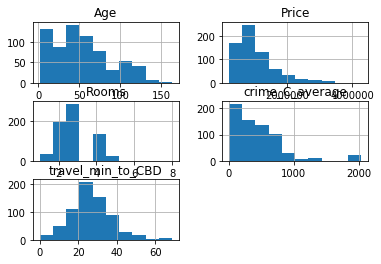

In [273]:
df.hist()

In [322]:
df.iloc[:,0:4].skew(axis = 0, skipna = True) 

Rooms                0.566962
crime_C_average      1.965224
travel_min_to_CBD    0.488366
Age                  0.539787
dtype: float64

### 1. Standardization (Z-score normalisation)

In [275]:
from sklearn import preprocessing

In [276]:
std_scale = preprocessing.StandardScaler().fit(df[['Rooms','crime_C_average','travel_min_to_CBD','Age']])
df_std = std_scale.transform(df[['Rooms','crime_C_average','travel_min_to_CBD','Age']])
df_std[0:5]

array([[ 0.08302173,  3.75393985, -0.2824065 , -0.6042624 ],
       [-1.97893612, -0.27845179, -1.23141145,  0.14854325],
       [ 0.08302173, -0.75887771, -1.52156486, -1.21229773],
       [ 0.08302173, -0.90507265, -0.90799204,  1.59624642],
       [-1.97893612, -0.77627792,  0.04840535,  1.30670578]])

In [277]:
df['Rooms_std'] = df_std[:,0] 
df['crime_C_average_std'] = df_std[:,1]
df['travel_min_to_CBD_std'] = df_std[:,2]
df['Age_std'] = df_std[:,3]
df.head()

,Rooms,crime_C_average,travel_min_to_CBD,Age,Price,Rooms_std,crime_C_average_std,travel_min_to_CBD_std,Age_std
0,3,2039.33,23.77,33.0,1800000.0,0.083022,3.753940,-0.282406,-0.604262
1,1,338.33,13.50,59.0,342000.0,-1.978936,-0.278452,-1.231411,0.148543
2,3,135.67,10.36,12.0,800000.0,0.083022,-0.758878,-1.521565,-1.212298
3,3,74.00,17.00,109.0,1037000.0,0.083022,-0.905073,-0.907992,1.596246
4,1,128.33,27.35,99.0,290000.0,-1.978936,-0.776278,0.048405,1.306706


In [278]:
df[['Rooms_std','crime_C_average_std','travel_min_to_CBD_std','Age_std']].describe()

,Rooms_std,crime_C_average_std,travel_min_to_CBD_std,Age_std
count,6.830000e+02,6.830000e+02,6.830000e+02,6.830000e+02
mean,-6.337455e-17,1.349173e-17,-4.031264e-16,-2.568305e-17
std,1.000733e+00,1.000733e+00,1.000733e+00,1.000733e+00
min,-1.978936e+00,-1.078126e+00,-2.478886e+00,-1.501838e+00
25%,-9.479572e-01,-7.027893e-01,-6.307754e-01,-9.227571e-01
50%,8.302173e-02,-2.784518e-01,-4.862047e-02,-1.409974e-01
75%,8.302173e-02,3.900576e-01,5.381547e-01,4.380839e-01
max,5.237916e+00,3.761052e+00,3.880463e+00,3.159766e+00


All the predictors are in different range. For example, crime_C_average has a large scale compared to other attributes. Number of rooms has very small scale, on the other hand

Text(0,0.5,'Price')

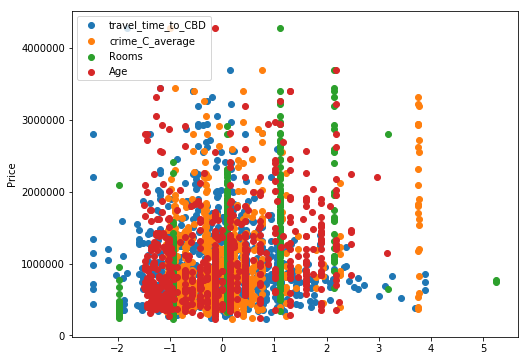

In [282]:
plt.figure(figsize=(8,6))

plt.scatter(df['travel_min_to_CBD_std'], df['Price'], label='travel_time_to_CBD'), plt.scatter(df['crime_C_average_std'], df['Price'], label='crime_C_average'), plt.scatter(df['Rooms_std'], df['Price'], label='Rooms'), plt.scatter(df['Age_std'], df['Price'], label='Age')

plt.legend(loc='upper left')
plt.ylabel('Price')

### 2. Min-max normalisation

In [283]:
minmax_scale = preprocessing.MinMaxScaler().fit(df[['Rooms','crime_C_average','travel_min_to_CBD','Age']])
df_minmax = minmax_scale.transform(df[['Rooms','crime_C_average','travel_min_to_CBD','Age']])
df_minmax[0:5]

array([[0.28571429, 0.99853037, 0.34539378, 0.19254658],
       [0.        , 0.16525011, 0.19616391, 0.35403727],
       [0.28571429, 0.06597169, 0.15053763, 0.0621118 ],
       [0.28571429, 0.035761  , 0.24702121, 0.66459627],
       [0.        , 0.062376  , 0.39741354, 0.60248447]])

In [284]:
df['Rooms_minmax'] = df_minmax[:,0] 
df['crime_C_average_minmax'] = df_minmax[:,1]
df['travel_min_to_CBD_minmax'] = df_minmax[:,2]
df['Age_minmax'] = df_minmax[:,3]
df.head()

,Rooms,crime_C_average,travel_min_to_CBD,Age,Price,Rooms_std,crime_C_average_std,travel_min_to_CBD_std,Age_std,Rooms_minmax,crime_C_average_minmax,travel_min_to_CBD_minmax,Age_minmax
0,3,2039.33,23.77,33.0,1800000.0,0.083022,3.753940,-0.282406,-0.604262,0.285714,0.998530,0.345394,0.192547
1,1,338.33,13.50,59.0,342000.0,-1.978936,-0.278452,-1.231411,0.148543,0.000000,0.165250,0.196164,0.354037
2,3,135.67,10.36,12.0,800000.0,0.083022,-0.758878,-1.521565,-1.212298,0.285714,0.065972,0.150538,0.062112
3,3,74.00,17.00,109.0,1037000.0,0.083022,-0.905073,-0.907992,1.596246,0.285714,0.035761,0.247021,0.664596
4,1,128.33,27.35,99.0,290000.0,-1.978936,-0.776278,0.048405,1.306706,0.000000,0.062376,0.397414,0.602484


In [285]:
df[['Rooms_minmax','crime_C_average_minmax','travel_min_to_CBD_minmax','Age_minmax']].describe()

,Rooms_minmax,crime_C_average_minmax,travel_min_to_CBD_minmax,Age_minmax
count,683.000000,683.000000,683.000000,683.000000
mean,0.274210,0.222791,0.389802,0.322172
std,0.138666,0.206798,0.157364,0.214676
min,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.077562,0.290613,0.124224
50%,0.285714,0.165250,0.382156,0.291925
75%,0.285714,0.303395,0.474426,0.416149
max,1.000000,1.000000,1.000000,1.000000


Text(0,0.5,'Price')

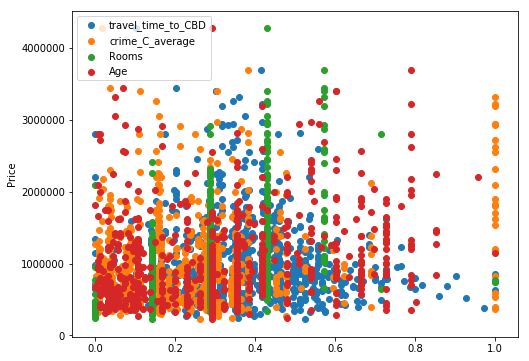

In [286]:
plt.figure(figsize=(8,6))

plt.scatter(df['travel_min_to_CBD_minmax'], df['Price'], label='travel_time_to_CBD'), plt.scatter(df['crime_C_average_minmax'], df['Price'], label='crime_C_average'), plt.scatter(df['Rooms_minmax'], df['Price'], label='Rooms'), plt.scatter(df['Age_minmax'], df['Price'], label='Age')

plt.legend(loc='upper left')
plt.ylabel('Price')

### 3. Root-transformation 
* For root-transformation, we can only apply on (1) original data and (2) min-max normalised data
* We cannot apply on standardised data because mathematically, we cannot square root a negative number

#### Root-transfomration on original data

In [287]:
import math

In [288]:
df['Rooms_root'] = None
df['crime_C_average_root'] = None
df['travel_min_to_CBD_root'] = None 
df['Age_root'] = None

for i in range(len(df)):
    df['Rooms_root'][i] = math.sqrt(df['Rooms'][i])
    df['crime_C_average_root'][i] = math.sqrt(df['crime_C_average'][i])
    df['travel_min_to_CBD_root'][i] = math.sqrt(df['travel_min_to_CBD'][i])
    df['Age_root'][i] = math.sqrt(df['Age'][i])

Text(0,0.5,'Price')

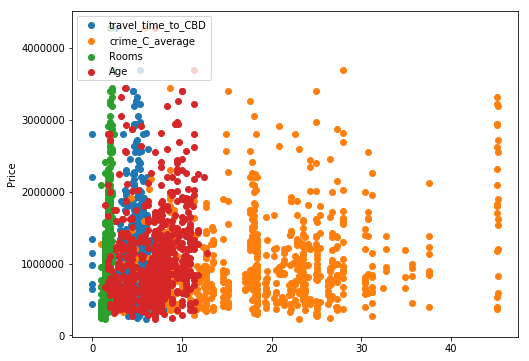

In [289]:
plt.figure(figsize=(8,6))

plt.scatter(df['travel_min_to_CBD_root'], df['Price'], label='travel_time_to_CBD'), plt.scatter(df['crime_C_average_root'], df['Price'], label='crime_C_average'), plt.scatter(df['Rooms_root'], df['Price'], label='Rooms'), plt.scatter(df['Age_root'], df['Price'], label='Age')

plt.legend(loc='upper left')
plt.ylabel('Price')

 #### Root- transformation on min-max normalized data

In [290]:
df['Rooms_minmax_root'] = None
df['crime_C_average_minmax_root'] = None
df['travel_min_to_CBD_minmax_root'] = None 
df['Age_minmax_root'] = None

for i in range(len(df)):
    df['Rooms_minmax_root'][i] = math.sqrt(df['Rooms_minmax'][i])
    df['crime_C_average_minmax_root'][i] = math.sqrt(df['crime_C_average_minmax'][i])
    df['travel_min_to_CBD_minmax_root'][i] = math.sqrt(df['travel_min_to_CBD_minmax'][i])
    df['Age_minmax_root'][i] = math.sqrt(df['Age_minmax'][i])

Text(0,0.5,'Price')

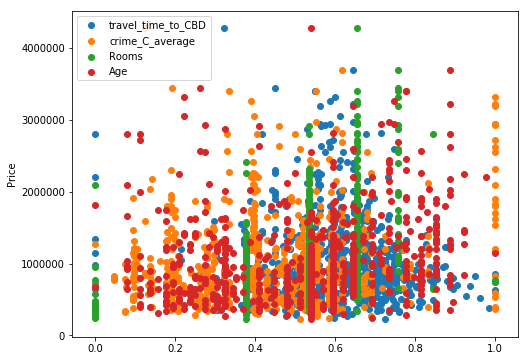

In [291]:
plt.figure(figsize=(8,6))

plt.scatter(df['travel_min_to_CBD_minmax_root'], df['Price'], label='travel_time_to_CBD'), plt.scatter(df['crime_C_average_minmax_root'], df['Price'], label='crime_C_average'), plt.scatter(df['Rooms_minmax_root'], df['Price'], label='Rooms'), plt.scatter(df['Age_minmax_root'], df['Price'], label='Age')

plt.legend(loc='upper left')
plt.ylabel('Price')

We can see that the root-transformation method on min-max normalized data performs not really well

### 5. Square-power transformation 
We are going to square-power transform out data
- (1) Orginal data
- (2) Min-max normalised data
- (3) Standardised data

#### Square-power on original data

In [292]:
df['Rooms_sq'] = None
df['crime_C_average_sq'] = None
df['travel_min_to_CBD_sq'] = None 
df['Age_sq'] = None

for i in range(len(df)):
    df['Rooms_sq'][i] = math.pow(df['Rooms'][i],2)
    df['crime_C_average_sq'][i] = math.pow(df['crime_C_average'][i],2)
    df['travel_min_to_CBD_sq'][i] = math.pow(df['travel_min_to_CBD'][i],2)
    df['Age_sq'][i] = math.pow(df['Age'][i],2)

Text(0,0.5,'Price')

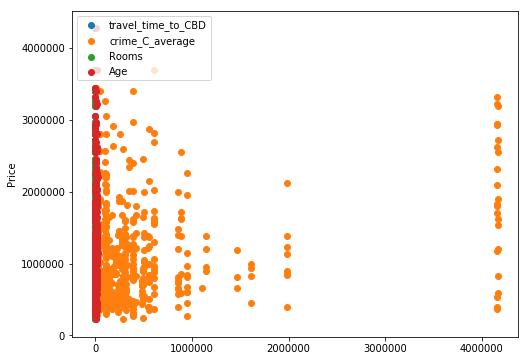

In [293]:
plt.figure(figsize=(8,6))

plt.scatter(df['travel_min_to_CBD_sq'], df['Price'], label='travel_time_to_CBD'), plt.scatter(df['crime_C_average_sq'], df['Price'], label='crime_C_average'), plt.scatter(df['Rooms_sq'], df['Price'], label='Rooms'), plt.scatter(df['Age_sq'], df['Price'], label='Age')

plt.legend(loc='upper left')
plt.ylabel('Price')

#### Square-power on standardised data

In [294]:
df['Rooms_std_sq'] = None
df['crime_C_average_std_sq'] = None
df['travel_min_to_CBD_std_sq'] = None 
df['Age_std_sq'] = None

for i in range(len(df)):
    df['Rooms_std_sq'][i] = math.pow(df['Rooms_std'][i],2)
    df['crime_C_average_std_sq'][i] = math.pow(df['crime_C_average_std'][i],2)
    df['travel_min_to_CBD_std_sq'][i] = math.pow(df['travel_min_to_CBD_std'][i],2)
    df['Age_std_sq'][i] = math.pow(df['Age_std'][i],2)

Text(0,0.5,'Price')

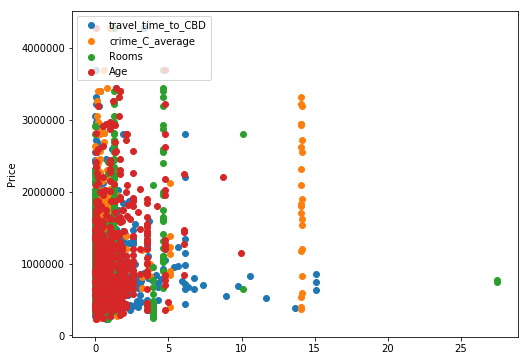

In [295]:
plt.figure(figsize=(8,6))

plt.scatter(df['travel_min_to_CBD_std_sq'], df['Price'], label='travel_time_to_CBD'), plt.scatter(df['crime_C_average_std_sq'], df['Price'], label='crime_C_average'), plt.scatter(df['Rooms_std_sq'], df['Price'], label='Rooms'), plt.scatter(df['Age_std_sq'], df['Price'], label='Age')

plt.legend(loc='upper left')
plt.ylabel('Price')

#### Square-power on min-max normalised data

In [296]:
df['Rooms_minmax_sq'] = None
df['crime_C_average_minmax_sq'] = None
df['travel_min_to_CBD_minmax_sq'] = None 
df['Age_minmax_sq'] = None

for i in range(len(df)):
    df['Rooms_minmax_sq'][i] = math.pow(df['Rooms_minmax'][i],2)
    df['crime_C_average_minmax_sq'][i] = math.pow(df['crime_C_average_minmax'][i],2)
    df['travel_min_to_CBD_minmax_sq'][i] = math.pow(df['travel_min_to_CBD_minmax'][i],2)
    df['Age_minmax_sq'][i] = math.pow(df['Age_minmax'][i],2)

Text(0,0.5,'Price')

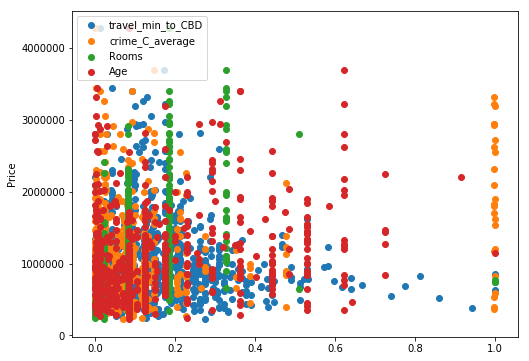

In [297]:
plt.figure(figsize=(8,6))
plt.scatter(df['travel_min_to_CBD_minmax_sq'], df['Price'],label='travel_min_to_CBD'), plt.scatter(df['crime_C_average_minmax_sq'], df['Price'], label='crime_C_average'), plt.scatter(df['Rooms_minmax_sq'], df['Price'], label='Rooms'), plt.scatter(df['Age_minmax_sq'], df['Price'], label='Age')
plt.legend(loc='upper left')
plt.ylabel('Price')

We can see that square-power transformation on min-max normalized data is a good method for travel_min_to_CBD


### 6. Log transformation 
We cannot use log-transformation on some features because mathematically, we cannot take log of 'zero' number. Whereas in our case, we have possible 'zero' numbers in the dataset, for example the predictor 'travel_min_to_CBD' or 'age', etc.

In [309]:
df['crime_C_average_log'] = None
df['Rooms_log'] = None
df['Age_log'] = None

for i in range(len(df)):
    df['crime_C_average_log'][i] = math.log(df['crime_C_average'][i])
    df['Rooms_log'][i] = math.log(df['Rooms'][i])
    df['Age_log'][i] = math.log(df['Age'][i])

Text(0,0.5,'Price')

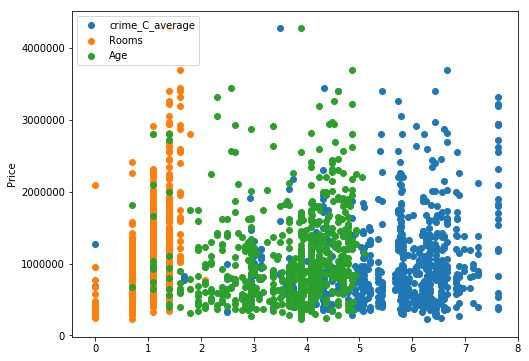

In [310]:
plt.figure(figsize=(8,6))
plt.scatter(df['crime_C_average_log'], df['Price'], label='crime_C_average'), plt.scatter(df['Rooms_log'], df['Price'], label='Rooms'), plt.scatter(df['Age_log'], df['Price'], label='Age')
plt.legend(loc='upper left')
plt.ylabel('Price')

### 7. Conclusion
From all the above normalization & transformation methods, the most optimal method is the  min-max normalized. Moreover, when we apply square-power on min-mix normalized data of travel_min_to_CBD, we see an improvement. Thus, the final method is:
* Normalize the data by min-max method
* After that, for travel_time_to_CBD, we take square-power

Now let's test with the linear regression to see if we have improvements after normalising & transforming

In [311]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [312]:
# original dataset
original_predictor = df[['Rooms','crime_C_average', 'Age', 'travel_min_to_CBD']]
target = df['Price']

X_train,X_test,y_train,y_test = train_test_split(original_predictor,target,test_size=0.2,random_state=4)

map(pd.np.shape,[X_train, X_test, y_train, y_test])

original_reg = LinearRegression()
original_reg.fit(X_train,y_train)

original_test = original_reg.predict(X_test)

print ('r-squared for this model = ',original_reg.score(X_test,y_test))

r-squared for this model =  0.4000888357733503


In [393]:
# normalized/standardised dataset
after_predictor = df[['Rooms_minmax','crime_C_average_minmax', 'Age_minmax', 'travel_min_to_CBD_minmax_sq']]
target = df['Price']

X_train,X_test,y_train,y_test = train_test_split(after_predictor,target,test_size=0.2,random_state=4)

map(pd.np.shape,[X_train, X_test, y_train, y_test])

after_reg = LinearRegression()
after_reg.fit(X_train,y_train)

after_test = after_reg.predict(X_test)

print ('r-squared for this model = ',after_reg.score(X_test,y_test))

r-squared for this model =  0.41181266225892676


There is a slight improvement in terms of R-square